In [39]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import seaborn as sns
import matplotlib.pyplot as plt
import re


In [92]:

# Import data 
Train_data= pd.read_csv('titanic/train.csv')
df_test= pd.read_csv('titanic/test.csv')
df_gender_submission= pd.read_csv('titanic/gender_submission.csv')
# Print first few rows
Train_data

# Check missing data percentage
print("Missing value percentages by variable")
Train_data.isnull().mean().round(4).mul(100).sort_values(ascending=False)

Missing value percentages by variable


Cabin          77.10
Age            19.87
Embarked        0.22
PassengerId     0.00
Survived        0.00
Pclass          0.00
Name            0.00
Sex             0.00
SibSp           0.00
Parch           0.00
Ticket          0.00
Fare            0.00
dtype: float64

In [93]:
# Check data types
Train_data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [94]:
# check the unique values count
print("Number of unique values in each columns")
for col in Train_data.columns:
    print(str(col)+ "   " + str(Train_data[col].nunique()))



Number of unique values in each columns
PassengerId   891
Survived   2
Pclass   3
Name   891
Sex   2
Age   88
SibSp   7
Parch   7
Ticket   681
Fare   248
Cabin   147
Embarked   3


In [95]:
# dropping unimportant columns
#Train_data.drop('Name',axis=1)
#Train_data.drop('Ticket',axis=1)
#Train_data.drop('PassengerId',axis=1)
#Train_data.drop('Cabin',axis=1)
#Train_data.drop('Embarked',axis=1)
Train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [99]:
# Print column names
list(Train_data.columns)
Train_data[['Age']] = Train_data[['Age']].fillna(value=Train_data.mean(skipna=True, numeric_only = True))
Train_data[['Age']] = Train_data[['Age']].round()

In [100]:
# Replace missing values with mode of the Embarked column
#Train_data['Embarked'] = Train_data['Embarked'].fillna(Train_data['Embarked'].mode()[0])
#Train_data.isnull().mean().round(4).mul(100).sort_values(ascending=False)

# OR can drop the missing rows
#Train_data = Train_data.drop(Train_data.loc[Train_data.get("Embarked").isna()].index)
# See if there is still any missing data in train dataset
print("Missing values remaining in the data set")
Train_data.isna().sum().max()

Missing values remaining in the data set


687

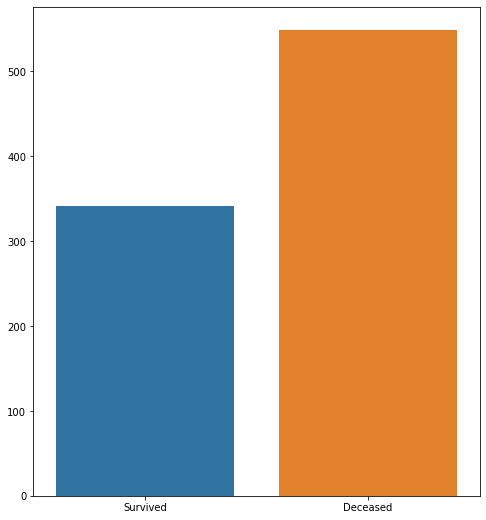

In [101]:
plt.figure(figsize=(8, 9))
survival_labels = ["Survived", "Deceased"]
survival_counts = [Train_data.Survived.value_counts()[1], Train_data.Survived.value_counts()[0]]
sns.barplot(x= survival_labels, y = survival_counts)
plt.show()

<AxesSubplot:xlabel='Sex', ylabel='Survived'>

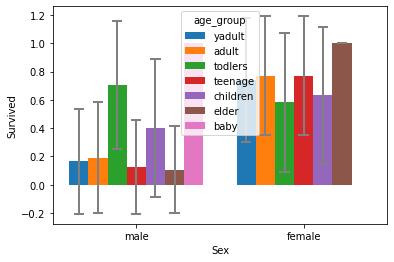

In [187]:
Train_data.loc[Train_data['Age'] <= 1, 'age_group'] = 'baby'
Train_data.loc[Train_data['Age'].between(1,3), 'age_group'] = 'todlers'
Train_data.loc[Train_data['Age'].between(4,10), 'age_group'] = 'children'
Train_data.loc[Train_data['Age'].between(11,19), 'age_group'] = 'teenage'
Train_data.loc[Train_data['Age'].between(20,35), 'age_group'] = 'yadult'
Train_data.loc[Train_data['Age'].between(36,60), 'age_group'] = 'adult'
Train_data.loc[Train_data['Age']>60, 'age_group'] = 'elder'

Train_data.loc[Train_data['Age'] <= 18, '2age_group'] = 'child'
Train_data.loc[Train_data['Age'] > 60, '2age_group'] = 'adult'


# create plot
sns.barplot(x = 'Sex', y = 'Survived', hue = 'age_group', data = Train_data,
            order = ['male', 'female'],  
            capsize = 0.05,             
            saturation = 8,             
            errcolor = 'gray', errwidth = 2,  
            ci = 'sd'   
            )


<AxesSubplot:xlabel='Sex', ylabel='Survived'>

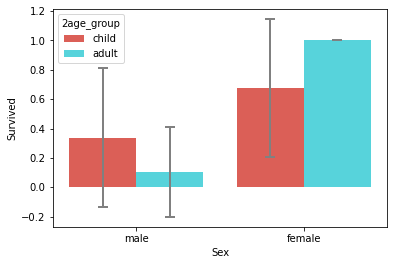

In [176]:
# create plot
sns.barplot(x = 'Sex', y = 'Survived',  hue = '2age_group',data = Train_data,
            palette = 'hls',
            order = ['male', 'female'],  
            capsize = 0.05,             
            saturation = 8,             
            errcolor = 'gray', errwidth = 2,  
            ci = 'sd'   
            )

In [ ]:
# create plot
sns.barplot(x = 'Sex', y = 'Survived',  hue = 'age_group',data = Train_data,
            palette = 'hls',
            order = ['male', 'female'],  
            capsize = 0.05,             
            saturation = 8,             
            errcolor = 'gray', errwidth = 2,  
            ci = 'sd'   
            )

In [103]:
Train_data.loc[Train_data['Age'].round() <= 10, 'mean_age'] = 5
Train_data.loc[Train_data['Age'].round().between(11,20), 'mean_age'] = 15
Train_data.loc[Train_data['Age'].round().between(21,30), 'mean_age'] = 25
Train_data.loc[Train_data['Age'].round().between(31,40), 'mean_age'] = 35
Train_data.loc[Train_data['Age'].round().between(41,50), 'mean_age'] = 45
Train_data.loc[Train_data['Age'].round().between(51,60), 'mean_age'] = 55
Train_data.loc[Train_data['Age'].round().between(61,70), 'mean_age'] = 65
Train_data.loc[Train_data['Age'].round().between(71,80), 'mean_age'] = 75
Train_data.loc[Train_data['Age'] > 80, 'mean_age'] = 85
Train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,age_group,mean_age
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,yadult,25.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,adult,35.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,yadult,25.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,yadult,35.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,yadult,35.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,yadult,25.0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,teenage,15.0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,30.0,1,2,W./C. 6607,23.4500,NaN,S,yadult,25.0
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,yadult,25.0


In [104]:
Train_data['Age'].unique()
# Check missing data percentage
Train_data.isnull()
Train_data.isnull().mean().round(4).mul(100).sort_values(ascending=False)

Cabin          77.10
Embarked        0.22
PassengerId     0.00
Survived        0.00
Pclass          0.00
Name            0.00
Sex             0.00
Age             0.00
SibSp           0.00
Parch           0.00
Ticket          0.00
Fare            0.00
age_group       0.00
mean_age        0.00
dtype: float64

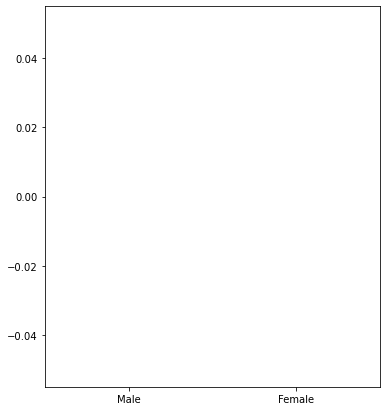

It is clear from the graph that there are more servival rate in females than males
Therefore, sex is identified as a good variable for classification


In [105]:
gender_labels = ["Male", "Female"]
gender_survival_counts = [len(Train_data[(Train_data.Survived == 1) & (Train_data.Sex == 1)]), len(Train_data[(Train_data.Survived == 1) & (Train_data.Sex == 0)])]
plt.figure(figsize=(6, 7))
sns.barplot(x = gender_labels, y = gender_survival_counts)
plt.show()
print('''It is clear from the graph that there are more servival rate in females than males
Therefore, sex is identified as a good variable for classification''')

It is clear from the graph that there are more servival rate in first class than second class
Similarly, there are more servival rate in second class  than third class
Therefore, pasenger class is a good variable for classification


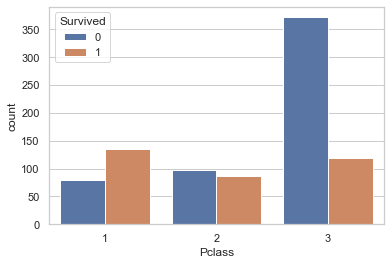

In [209]:
#clrs = ['red' if (Train_data['Pclass'] == 1) else 'blue' for x in Train_data['Pclass'] ]
#sns.countplot(sns.color_palette("Greens"))
sns.set(style="whitegrid", color_codes=False)
sns.countplot(x=Train_data['Pclass'], hue=Train_data['Survived'])
print('''It is clear from the graph that there are more servival rate in first class than second class
Similarly, there are more servival rate in second class  than third class
Therefore, pasenger class is a good variable for classification''')

In [107]:
# Check if there is data variation between passenger class and servival
Train_data['Survived'].groupby(Train_data['Pclass']).mean()

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

<AxesSubplot:xlabel='Name_Title', ylabel='count'>

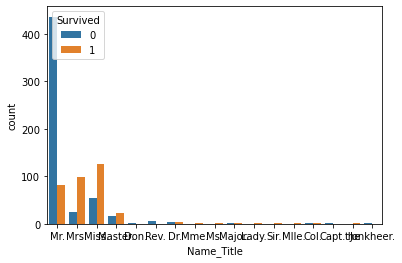

In [108]:
Train_data['Name_Title'] = Train_data['Name'].apply(lambda x: x.split(',')[1]).apply(lambda x: x.split()[0])

Train_data['Name_Title'].value_counts()
sns.countplot(x=Train_data['Name_Title'], hue=Train_data['Survived'])

In [109]:
train_rf = Train_data

train_rf['Survived'] = train_rf['Survived'].astype(object)
train_rf['Pclass'] = train_rf['Pclass'].astype(object)
train_rf['Sex'] = train_rf['Sex'].astype(object)
train_rf.loc[train_rf['Age'] <= 1, 'age_group'] = 'baby'
train_rf.loc[train_rf['Age'].between(1,3), 'age_group'] = 'todlers'
train_rf.loc[train_rf['Age'].between(4,10), 'age_group'] = 'children'
train_rf.loc[train_rf['Age'].between(11,19), 'age_group'] = 'teenage'
train_rf.loc[train_rf['Age'].between(20,35), 'age_group'] = 'yadult'
train_rf.loc[train_rf['Age'].between(36,60), 'age_group'] = 'adult'
train_rf.loc[train_rf['Age']>60, 'age_group'] = 'elder'
train_rf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    object 
 2   Pclass       891 non-null    object 
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  age_group    891 non-null    object 
 13  mean_age     891 non-null    float64
 14  Name_Title   891 non-null    object 
dtypes: float64(3), int64(3), object(9)
memory usage: 104.5+ KB


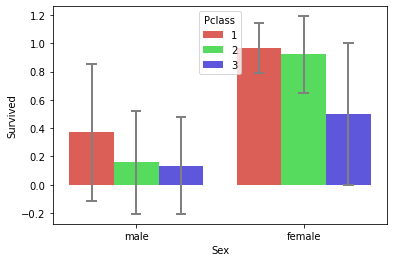

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,age_group,mean_age,Name_Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,yadult,25.0,Mr.
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,adult,35.0,Mrs.
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,yadult,25.0,Miss.
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,yadult,35.0,Mrs.
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,yadult,35.0,Mr.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,yadult,25.0,Rev.
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,teenage,15.0,Miss.
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,30.0,1,2,W./C. 6607,23.4500,NaN,S,yadult,25.0,Miss.
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,yadult,25.0,Mr.


In [110]:
# create plot
sns.barplot(x = 'Sex', y = 'Survived', hue = 'Pclass', data = Train_data,
            palette = 'hls',
            order = ['male', 'female'],  
            capsize = 0.05,             
            saturation = 8,             
            errcolor = 'gray', errwidth = 2,  
            ci = 'sd')


plt.show()
Train_data

In [27]:
'''from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(criterion='gini', 
                             n_estimators=700,
                             min_samples_split=10,
                             min_samples_leaf=1,
                             max_features='auto',
                             oob_score=True,
                             random_state=1,
                             n_jobs=-1)
rf.fit(train.iloc[:, 1:], train.iloc[:, 0])
print("%.4f" % rf.oob_score_)'''

'from sklearn.ensemble import RandomForestClassifier\n\nrf = RandomForestClassifier(criterion=\'gini\', \n                             n_estimators=700,\n                             min_samples_split=10,\n                             min_samples_leaf=1,\n                             max_features=\'auto\',\n                             oob_score=True,\n                             random_state=1,\n                             n_jobs=-1)\nrf.fit(train.iloc[:, 1:], train.iloc[:, 0])\nprint("%.4f" % rf.oob_score_)'

The data can be converted to numeric type inorder to use algorithms that use only numeric variables

In [28]:
'''Train_data_numeric = Train_data
# Convert sex variable to numeric values
Train_data_numeric['Sex'] = Train_data_numeric['Sex'].replace(['female','male'],[0,1])
Train_data_numeric'''

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,age_group,mean_age,Name_Title
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S,yadult,25.0,Mr.
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C,adult,35.0,Mrs.
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,yadult,25.0,Miss.
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S,yadult,35.0,Mrs.
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S,yadult,35.0,Mr.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,27.0,0,0,211536,13.0000,NaN,S,yadult,25.0,Rev.
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.0,0,0,112053,30.0000,B42,S,teenage,15.0,Miss.
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,30.0,1,2,W./C. 6607,23.4500,NaN,S,yadult,25.0,Miss.
889,890,1,1,"Behr, Mr. Karl Howell",1,26.0,0,0,111369,30.0000,C148,C,yadult,25.0,Mr.


Family class with parent and children

SibSp: number of siblings/spouse

Parch: number of childre/parents

With the number of siblings or spouse and the number of children or parents we can create new class called Family.

In [111]:
# Get pasengers who travel with family (either siblings,spouse, childre or parents)
# Get the rows which has values for either SibSp column or Parch
Train_data_families = Train_data.loc[(Train_data['SibSp'] > 0) | (Train_data['Parch'] > 0)]
Train_data_families

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,age_group,mean_age,Name_Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,yadult,25.0,Mr.
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,adult,35.0,Mrs.
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,yadult,35.0,Mrs.
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,todlers,5.0,Master.
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,yadult,25.0,Mrs.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
874,875,1,2,"Abelson, Mrs. Samuel (Hannah Wizosky)",female,28.0,1,0,P/PP 3381,24.0000,NaN,C,yadult,25.0,Mrs.
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C,adult,55.0,Mrs.
880,881,1,2,"Shelley, Mrs. William (Imanita Parrish Hall)",female,25.0,0,1,230433,26.0000,NaN,S,yadult,25.0,Mrs.
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q,adult,35.0,Mrs.


In [112]:
def extract_last_name(x):
    # String x will split by ',' and take the first element in the resulting list. 
    # Then any whitespaces at the front and end of the first element will be truncated and returned
    return x.split(",")[0].strip() 


In [194]:
Train_data_families["LastName"] = Train_data_families["Name"].apply(extract_last_name)
Train_data_families.to_csv('family.csv')
list_of_n_members = Train_data_families.groupby(['LastName']).size()
# List of family names to identify members of one family
lastname_list = list(Train_data_families["LastName"].unique())
print(lastname_list[4])


Johnson


/var/folders/vj/796j6ms967z0rkptghjx57zm0000gn/T/ipykernel_63981/2103876075.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Train_data_families["LastName"] = Train_data_families["Name"].apply(extract_last_name)


In [114]:
#Sometimes tickets of passengers traveling together differ in their last digit, removing the last digit of the Ticket. 

Train_data_families["Ticket"] = Train_data_families["Ticket"].apply(lambda x: re.sub('.$','X',x))
Train_data_families

/var/folders/vj/796j6ms967z0rkptghjx57zm0000gn/T/ipykernel_63981/1749801548.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Train_data_families["Ticket"] = Train_data_families["Ticket"].apply(lambda x: re.sub('.$','X',x))


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,age_group,mean_age,Name_Title,LastName
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 2117X,7.2500,NaN,S,yadult,25.0,Mr.,Braund
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 1759X,71.2833,C85,C,adult,35.0,Mrs.,Cumings
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,11380X,53.1000,C123,S,yadult,35.0,Mrs.,Futrelle
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,34990X,21.0750,NaN,S,todlers,5.0,Master.,Palsson
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,34774X,11.1333,NaN,S,yadult,25.0,Mrs.,Johnson
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
874,875,1,2,"Abelson, Mrs. Samuel (Hannah Wizosky)",female,28.0,1,0,P/PP 338X,24.0000,NaN,C,yadult,25.0,Mrs.,Abelson
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,1176X,83.1583,C50,C,adult,55.0,Mrs.,Potter
880,881,1,2,"Shelley, Mrs. William (Imanita Parrish Hall)",female,25.0,0,1,23043X,26.0000,NaN,S,yadult,25.0,Mrs.,Shelley
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,38265X,29.1250,NaN,Q,adult,35.0,Mrs.,Rice


Noticed that when only last names are match to group families, there can be different families with same last names.
Therefore, the ticket number also used to identify families traveling together

In [190]:
class Person:
    
    def __init__(self, last_name, ticket, full_name, survival, age, sex):
        self.last_name = last_name
        self.ticket = ticket
        self.full_name = full_name
        self.survival = survival
        self.age = age
        self.sex = sex

    #def __iter__(self):
        #person = [self.]

In [192]:
# Create list of tuples with selected column data
with_family_list = list(zip(Train_data_families["Survived"], Train_data_families["Pclass"], Train_data_families["Name"], Train_data_families["Sex"],
Train_data_families["Age"], Train_data_families["SibSp"], Train_data_families["Parch"], Train_data_families["Ticket"], Train_data_families["LastName"]))
list_of_pasengers = []
#print (tuples)
for item in with_family_list:
    p = Person(item[8], item[7], item[2], item[0], item[4], item[3])
    list_of_pasengers.append(p)

# Just a test
print(list_of_pasengers[6].last_name)
print(list_of_pasengers[6].full_name)
print(list_of_pasengers[6].ticket)
print(list_of_pasengers[6].survival)
print(list_of_pasengers[6].sex)
print(list_of_pasengers[6].age)



Sandstrom
Sandstrom, Miss. Marguerite Rut
PP 954X
1
female
4.0


In [193]:
print(len(list_of_pasengers))

354


In [171]:
families_dict = {}
for p in list_of_pasengers:
    key = f'{p.last_name}_{p.ticket}'
    if (key in families_dict):
        families_dict[key].append(p)
    else:    
        families_dict[key] = [p]


In [198]:
print(f'Number of members traveled with family is {len(families_dict)}')


Number of members traveled with family is 196


In [197]:
# create a dictionary for family who traveled as a group
family_group_dict = {}
# If the family has more than one member with same surname and whose ticket nimbers are same when last digit disregarded,
# added to another dictionary
for key in families_dict:
    if len(families_dict[key]) > 1:
        family_group_dict[key] = families_dict[key]

print(f'Number of families traveled together is {len(family_group_dict)}')

Number of families traveled together is 103


Calculate the percentage of adult males and females survived in families

In [182]:
total_male = 0
total_female = 0
total_children = 0
number_f_adult_s = 0
number_m_adult_s = 0
number_child_s = 0
# Each key value pair represent a family
# Each value in the families_dict is a list family members
for key in family_group_dict:
    #family_mem_list = family_group_dict[key]
    for person in family_group_dict[key]:
        if person.age < 18:
            total_children += 1
            if person.survival == 1:
                number_child_s += 1
        else:
            if (person.sex == "male"):
                total_male += 1
                if(person.survival == 1):
                    number_m_adult_s += 1
            else:
                total_female +=1
                if(person.survival == 1):
                    number_f_adult_s += 1

print('When traveled as a family')
print("percentage of males survived " + str(round(100 * number_m_adult_s/total_male)) + '%')
print("percentage of females survived " + str(round(100 * number_f_adult_s/total_female)) + '%')
print("percentage of children survived " + str(round(100 * number_child_s/total_children)) + '%')


When traveled as a family
percentage of males survived 19%
percentage of females survived 67%
percentage of children survived 52%


In [189]:
#Train_data.groupby(Train_data['2age_groups', 'sex']).Train_data['Survived'].mean()
Train_data.groupby(['2age_group', 'Sex'], as_index=False)['Survived'].mean()

,2age_group,Sex,Survived
0,adult,female,1.000000
1,adult,male,0.105263
2,child,female,0.676471
3,child,male,0.338028


In [210]:
#Calculate variance using a function

def variance_calculator(df_variable):
    sum_variable = 0
    for value in df_variable:
        sum_variable += value
    mean = sum_variable/len(df_variable)

 
    sum_of_squares = 0
    for value in df_variable:
        sum_of_squares += value **2
    mean_squares = sum_of_squares/len(df_variable)


    return mean_squares - mean**2

# The above calculation can also be done using the method numpy.var
# np.var(df_variable)

In [213]:
print(round(variance_calculator(Train_data.Fare),2))

2466.67


In [214]:
print(round(np.var(Train_data.Fare),2))

2466.67
